<a href="https://colab.research.google.com/github/maysarahkhld/ANN-image-classification/blob/main/aldamay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/3scene

/content/drive/MyDrive/Colab Notebooks/3scene


In [5]:
ls

3scene/


In [6]:
cd /content/drive/MyDrive/Colab Notebooks/3scene/3scene

/content/drive/MyDrive/Colab Notebooks/3scene/3scene


In [7]:
ls

coast/  forest/  highway/


In [9]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [10]:
imagePaths = paths.list_images("/content/drive/MyDrive/Colab Notebooks/3scene")
data = [] # membuat array yang berisi gambar-gambar pada data set
labels = [] # membuat array yang akan menjadi label dari dataset
print('loading image')
print(data) 
print (labels)

loading image
[]
[]


In [11]:
# melakukan looping hingga seluruh image selesai
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((28,28))) / 255.0 #normalisasi
	data.append(image)

	# mengekstrak label class dari file path dan mengupdate list label
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [12]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [13]:
# me-encode labels untuk mengubah label yang awalnya string menjadi integer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [15]:
#membagi dataset menjadi data train dan data untuk validasi
#10% untuk data validasi dan 80% untuk data training
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.15)
print(trainX.shape)
print(testX.shape)

(805, 28, 28, 3)
(143, 28, 28, 3)


In [16]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(28*28*3,)),
        # Dense(200, activation="relu", name="layer1"),
        Dense(200, activation="relu", name="layer1"),
        Dense(100, activation="relu", name="layer2"),
        Dense(50, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
layer1 (Dense)               (None, 200)               470600    
_________________________________________________________________
layer2 (Dense)               (None, 100)               20100     
_________________________________________________________________
layer3 (Dense)               (None, 50)                5050      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 153       
Total params: 495,903
Trainable params: 495,903
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=16)

Epoch 1/50
51/51 [==============================] - 0s 6ms/step - loss: 0.1504 - accuracy: 0.9516 - val_loss: 1.2609 - val_accuracy: 0.8112
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0722 - accuracy: 0.9752 - val_loss: 1.0740 - val_accuracy: 0.8182
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0384 - accuracy: 0.9863 - val_loss: 0.9211 - val_accuracy: 0.8182
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9975 - val_loss: 1.1237 - val_accuracy: 0.8042
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9963 - val_loss: 1.5378 - val_accuracy: 0.7273
Epoch 6/50
51/51 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9727 - val_loss: 1.0527 - val_accuracy: 0.7622
Epoch 7/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9540 - val_loss: 0.9920 - val_accuracy: 0.7972
Epoch 8/50
51/51 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


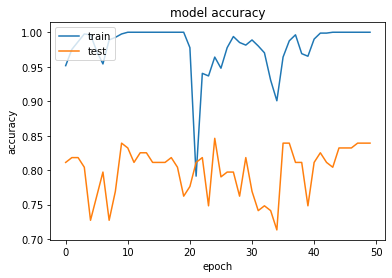

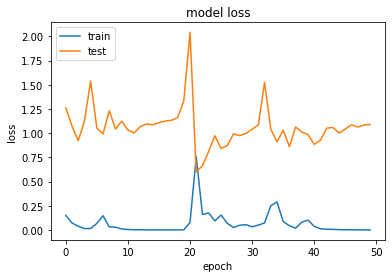

In [20]:
import matplotlib.pyplot as plt
print(H.history.keys())
#menampilkan akurasi dalam grafik
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#menampilkan loss dalam grafik
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.85      0.86      0.85        64
      forest       0.90      0.85      0.88        55
     highway       0.69      0.75      0.72        24

    accuracy                           0.84       143
   macro avg       0.81      0.82      0.82       143
weighted avg       0.84      0.84      0.84       143



In [24]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/6 The Road To The Canadian Rockies.jpg'

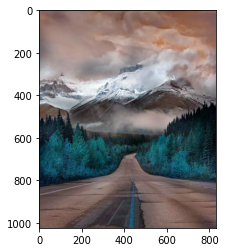

In [25]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [27]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/6 The Road To The Canadian Rockies.jpg')
image_testing = np.array(image_testing.resize((28 ,28 ))) / 255.0
image_testing.shape

(28, 28, 3)

In [28]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 28, 28, 3)


In [29]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[3.2731509e-04 1.1143566e-02 9.8852915e-01]]
['highway']
